# Separate runs by HKLE due to size limits

# Positions rounded to 10,000

In [1]:
gpmpdata="focused.10000.T.csv.gz"

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
#threshold=3

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

# Read raw TCGA data and cleanup

In [21]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df.head()

chromosome                             chr1                                  \
position                            1400000 1410000 1580000 3750000 5570000   
sample         pup    hkle     mapq                                           
SF12149_S1L0_E paired HERVK113 Q20       11      10      11       0       0   
                      SVA_A    Q20        0       0       0       0       0   
                      SVA_B    Q20        0       0       2       0       0   
                      SVA_C    Q20        0       0       0       0       0   
                      SVA_D    Q20        0       0       0       0       0   

chromosome                                                                   \
position                            5590000 6300000 6710000 7570000 7600000   
sample         pup    hkle     mapq                                           
SF12149_S1L0_E paired HERVK113 Q20        0       3       0       0       0   
                      SVA_A    Q20        0       5      18       0      17   
                      SVA_B    Q20        0       2      14       0       8   
                      SVA_C    Q20        0       4      16       0      12   
                      SVA_D    Q20        0       4      16       0      13   

chromosome                           ...     chrY                             \
position                             ... 12460000 12870000 13100000 15770000   
sample         pup    hkle     mapq  ...                                       
SF12149_S1L0_E paired HERVK113 Q20   ...        1        1        3        2   
                      SVA_A    Q20   ...        0        6        0        0   
                      SVA_B    Q20   ...        0        2        0        0   
                      SVA_C    Q20   ...        0        3        0        0   
                      SVA_D    Q20   ...        0        4        0        0   

chromosome                                                               \
position                            19530000 19690000 19700000 20550000   
sample         pup    hkle     mapq                                       
SF12149_S1L0_E paired HERVK113 Q20         0        1       10        0   
                      SVA_A    Q20         0        0        0        4   
                      SVA_B    Q20         0        0        0        6   
                      SVA_C    Q20         0        0        0        4   
                      SVA_D    Q20         0        0        0        4   

chromosome                                             
position                            20970000 21210000  
sample         pup    hkle     mapq                    
SF12149_S1L0_E paired HERVK113 Q20         0        0  
                      SVA_A    Q20         0        0  
                      SVA_B    Q20         0        0  
                      SVA_C    Q20         0        0  
                      SVA_D    Q20         0        0  

[5 rows x 4940 columns]

In [22]:
gpmp_df.reset_index(inplace=True)
gpmp_df.head()

chromosome          sample     pup      hkle mapq    chr1                  \
position                                          1400000 1410000 1580000   
0           SF12149_S1L0_E  paired  HERVK113  Q20      11      10      11   
1           SF12149_S1L0_E  paired     SVA_A  Q20       0       0       0   
2           SF12149_S1L0_E  paired     SVA_B  Q20       0       0       2   
3           SF12149_S1L0_E  paired     SVA_C  Q20       0       0       0   
4           SF12149_S1L0_E  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   3750000 5570000 5590000  ... 12460000 12870000 13100000 15770000   
0                0       0       0  ...        1        1        3        2   
1                0       0       0  ...        0        6        0        0   
2                0       0       0  ...        0        2        0        0   
3                0       0       0  ...        0        3        0        0   
4                0       0       0  ...        0        4        0        0   

chromosome                                                        
position   19530000 19690000 19700000 20550000 20970000 21210000  
0                 0        1       10        0        0        0  
1                 0        0        0        4        0        0  
2                 0        0        0        6        0        0  
3                 0        0        0        4        0        0  
4                 0        0        0        4        0        0  

[5 rows x 4944 columns]

In [23]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

0      SF12149
1      SF12149
2      SF12149
3      SF12149
4      SF12149
        ...   
443    SF12656
444    SF12656
445    SF12656
446    SF12656
447    SF12656
Name: subject, Length: 448, dtype: object

In [24]:
gpmp_df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1400000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            (   'chr1',  '3750000'),
            (   'chr1',  '5570000'),
            (   'chr1',  '5590000'),
            ...
            (   'chrY', '12870000'),
            (   'chrY', '13100000'),
            (   'chrY', '15770000'),
            (   'chrY', '19530000'),
            (   'chrY', '19690000'),
            (   'chrY', '19700000'),
            (   'chrY', '20550000'),
            (   'chrY', '20970000'),
            (   'chrY', '21210000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=4945)

In [25]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df.head()

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1400000 1410000 1580000   
0            SF12149_S1L0_E  paired  HERVK113  Q20      11      10      11   
7            SF12149_S1L1_N  paired  HERVK113  Q20       5       2       0   
14          SF12149_S2L0_NE  paired  HERVK113  Q20       6       3      14   
21           SF12210_S2L1_N  paired  HERVK113  Q20       5       1       4   
28           SF12210_S3L1_E  paired  HERVK113  Q20      14       5       9   

chromosome                          ...     chrY                             \
position   3750000 5570000 5590000  ... 12870000 13100000 15770000 19530000   
0                0       0       0  ...        1        3        2        0   
7                1       0       0  ...        0        1        1        0   
14               1       0       0  ...        0        4        1        0   
21               0       0       0  ...        0        0        0        0   
28               1       2       0  ...        0        0        0        0   

chromosome                                               subject  
position   19690000 19700000 20550000 20970000 21210000           
0                 1       10        0        0        0  SF12149  
7                 2        3        0        0        0  SF12149  
14                6        2        0        0        0  SF12149  
21                0        0        0        0        0  SF12210  
28                0        0        0        0        0  SF12210  

[5 rows x 4945 columns]

In [26]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df.head()

chromosome                                      chr1                          \
position                                     1400000 1410000 1580000 3750000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L0_E  paired HERVK113 Q20       11      10      11       0   
        SF12149_S1L1_N  paired HERVK113 Q20        5       2       0       1   
        SF12149_S2L0_NE paired HERVK113 Q20        6       3      14       1   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        5       1       4       0   
        SF12210_S3L1_E  paired HERVK113 Q20       14       5       9       1   

chromosome                                                                    \
position                                     5570000 5590000 6300000 6710000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L0_E  paired HERVK113 Q20        0       0       3       0   
        SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0   
        SF12149_S2L0_NE paired HERVK113 Q20        0       0       1       1   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0       0       0   
        SF12210_S3L1_E  paired HERVK113 Q20        2       0       0       0   

chromosome                                                    ...     chrY  \
position                                     7570000 7600000  ... 12460000   
subject sample          pup    hkle     mapq                  ...            
SF12149 SF12149_S1L0_E  paired HERVK113 Q20        0       0  ...        1   
        SF12149_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
        SF12149_S2L0_NE paired HERVK113 Q20        0       0  ...        5   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
        SF12210_S3L1_E  paired HERVK113 Q20        0       0  ...        0   

chromosome                                                               \
position                                     12870000 13100000 15770000   
subject sample          pup    hkle     mapq                              
SF12149 SF12149_S1L0_E  paired HERVK113 Q20         1        3        2   
        SF12149_S1L1_N  paired HERVK113 Q20         0        1        1   
        SF12149_S2L0_NE paired HERVK113 Q20         0        4        1   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20         0        0        0   
        SF12210_S3L1_E  paired HERVK113 Q20         0        0        0   

chromosome                                                               \
position                                     19530000 19690000 19700000   
subject sample          pup    hkle     mapq                              
SF12149 SF12149_S1L0_E  paired HERVK113 Q20         0        1       10   
        SF12149_S1L1_N  paired HERVK113 Q20         0        2        3   
        SF12149_S2L0_NE paired HERVK113 Q20         0        6        2   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20         0        0        0   
        SF12210_S3L1_E  paired HERVK113 Q20         0        0        0   

chromosome                                                               
position                                     20550000 20970000 21210000  
subject sample          pup    hkle     mapq                             
SF12149 SF12149_S1L0_E  paired HERVK113 Q20         0        0        0  
        SF12149_S1L1_N  paired HERVK113 Q20         0        0        0  
        SF12149_S2L0_NE paired HERVK113 Q20         0        0        0  
SF12210 SF12210_S2L1_N  paired HERVK113 Q20         0        0        0  
        SF12210_S3L1_E  paired HERVK113 Q20         0        0        0  

[5 rows x 4940 columns]

In [27]:
gpmp_df.shape

(64, 4940)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [28]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [29]:
gpmp_df.head()

chromosome                 chr1                                          \
position                1400000 1410000 1580000 3750000 5570000 5590000   
subject sample                                                            
SF12149 SF12149_S1L0_E       11      10      11       0       0       0   
        SF12149_S1L1_N        5       2       0       1       0       0   
        SF12149_S2L0_NE       6       3      14       1       0       0   
SF12210 SF12210_S2L1_N        5       1       4       0       0       0   
        SF12210_S3L1_E       14       5       9       1       2       0   

chromosome                                               ...     chrY  \
position                6300000 6710000 7570000 7600000  ... 12460000   
subject sample                                           ...            
SF12149 SF12149_S1L0_E        3       0       0       0  ...        1   
        SF12149_S1L1_N        0       0       0       0  ...        0   
        SF12149_S2L0_NE       1       1       0       0  ...        5   
SF12210 SF12210_S2L1_N        0       0       0       0  ...        0   
        SF12210_S3L1_E        0       0       0       0  ...        0   

chromosome                                                                     \
position                12870000 13100000 15770000 19530000 19690000 19700000   
subject sample                                                                  
SF12149 SF12149_S1L0_E         1        3        2        0        1       10   
        SF12149_S1L1_N         0        1        1        0        2        3   
        SF12149_S2L0_NE        0        4        1        0        6        2   
SF12210 SF12210_S2L1_N         0        0        0        0        0        0   
        SF12210_S3L1_E         0        0        0        0        0        0   

chromosome                                          
position                20550000 20970000 21210000  
subject sample                                      
SF12149 SF12149_S1L0_E         0        0        0  
        SF12149_S1L1_N         0        0        0  
        SF12149_S2L0_NE        0        0        0  
SF12210 SF12210_S2L1_N         0        0        0  
        SF12210_S3L1_E         0        0        0  

[5 rows x 4940 columns]

In [30]:
gpmp_df.shape

(64, 4940)

In [31]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

chr1 1400000  chr1 1410000  chr1 1580000  \
subject sample                                                       
SF12149 SF12149_S1L0_E              11            10            11   
        SF12149_S1L1_N               5             2             0   
        SF12149_S2L0_NE              6             3            14   
SF12210 SF12210_S2L1_N               5             1             4   
        SF12210_S3L1_E              14             5             9   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              3             1            13   
        SF12634_S13L4_E              5             4             9   
        SF12634_S14L4_NE             2             4             6   
SF12656 SF12656_S11L4_N              6             1             5   
        SF12656_S1L1_E              10             3             0   

                          chr1 3750000  chr1 5570000  chr1 5590000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               0             0             0   
        SF12149_S1L1_N               1             0             0   
        SF12149_S2L0_NE              1             0             0   
SF12210 SF12210_S2L1_N               0             0             0   
        SF12210_S3L1_E               1             2             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              0             1             0   
        SF12634_S13L4_E              0             3             0   
        SF12634_S14L4_NE             1             1             0   
SF12656 SF12656_S11L4_N              1             0             0   
        SF12656_S1L1_E               0             1             0   

                          chr1 6300000  chr1 6710000  chr1 7570000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               3             0             0   
        SF12149_S1L1_N               0             0             0   
        SF12149_S2L0_NE              1             1             0   
SF12210 SF12210_S2L1_N               0             0             0   
        SF12210_S3L1_E               0             0             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              0             0             0   
        SF12634_S13L4_E              0             0             0   
        SF12634_S14L4_NE             0             0             0   
SF12656 SF12656_S11L4_N              0             0             0   
        SF12656_S1L1_E               0             0             0   

                          chr1 7600000  ...  chrY 12460000  chrY 12870000  \
subject sample                          ...                                 
SF12149 SF12149_S1L0_E               0  ...              1              1   
        SF12149_S1L1_N               0  ...              0              0   
        SF12149_S2L0_NE              0  ...              5              0   
SF12210 SF12210_S2L1_N               0  ...              0              0   
        SF12210_S3L1_E               0  ...              0              0   
...                                ...  ...            ...            ...   
SF12634 SF12634_S10L4_N              0  ...              3              0   
        SF12634_S13L4_E              0  ...              3              0   
        SF12634_S14L4_NE             0  ...              1              0   
SF12656 SF12656_S11L4_N              0  ...              0              0   
        SF12656_S1L1_E               0  ...              0              0   

                          chrY 13100000  chrY 15770000  chrY 19530000  \
subject sample                                                          
SF12149 SF12149_S1L0_E                3              2              0   
        SF12149_S1L1_N                1              1              0   

In [32]:
gpmp_df.reset_index(inplace=True)
gpmp_df['type']=gpmp_df['sample'].str.split('_',expand=True)[2]

In [33]:
gpmp_df['type'].head()

0     E
1     N
2    NE
3     N
4     E
Name: type, dtype: object

In [34]:
gpmp_df.head()

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,SF12149,SF12149_S1L0_E,11,10,11,0,0,0,3,0,...,1,3,2,0,1,10,0,0,0,E
1,SF12149,SF12149_S1L1_N,5,2,0,1,0,0,0,0,...,0,1,1,0,2,3,0,0,0,N
2,SF12149,SF12149_S2L0_NE,6,3,14,1,0,0,1,1,...,0,4,1,0,6,2,0,0,0,NE
3,SF12210,SF12210_S2L1_N,5,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,SF12210,SF12210_S3L1_E,14,5,9,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,E


# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [35]:
gpmp_counts=pd.read_csv("raw_read_counts.csv")
gpmp_counts.head()

,sample,raw pair count
0,SF12149_S1L0_E,1515318278
1,SF12149_S1L1_N,660620929
2,SF12149_S2L0_NE,1334986480
3,SF12210_S2L1_N,597544666
4,SF12210_S3L1_E,1487133148


In [36]:
gpmp_df.reset_index(drop=True,inplace=True)
gpmp_df

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,SF12149,SF12149_S1L0_E,11,10,11,0,0,0,3,0,...,1,3,2,0,1,10,0,0,0,E
1,SF12149,SF12149_S1L1_N,5,2,0,1,0,0,0,0,...,0,1,1,0,2,3,0,0,0,N
2,SF12149,SF12149_S2L0_NE,6,3,14,1,0,0,1,1,...,0,4,1,0,6,2,0,0,0,NE
3,SF12210,SF12210_S2L1_N,5,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,SF12210,SF12210_S3L1_E,14,5,9,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SF12634,SF12634_S10L4_N,3,1,13,0,1,0,0,0,...,0,6,0,0,1,1,0,0,0,N
60,SF12634,SF12634_S13L4_E,5,4,9,0,3,0,0,0,...,0,4,0,0,1,3,0,0,0,E
61,SF12634,SF12634_S14L4_NE,2,4,6,1,1,0,0,0,...,0,4,3,0,1,7,1,1,0,NE
62,SF12656,SF12656_S11L4_N,6,1,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [37]:
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
#gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count
0,SF12149,SF12149_S1L0_E,11,10,11,0,0,0,3,0,...,3,2,0,1,10,0,0,0,E,1515318278
1,SF12149,SF12149_S1L1_N,5,2,0,1,0,0,0,0,...,1,1,0,2,3,0,0,0,N,660620929
2,SF12149,SF12149_S2L0_NE,6,3,14,1,0,0,1,1,...,4,1,0,6,2,0,0,0,NE,1334986480
3,SF12210,SF12210_S2L1_N,5,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,N,597544666
4,SF12210,SF12210_S3L1_E,14,5,9,1,2,0,0,0,...,0,0,0,0,0,0,0,0,E,1487133148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SF12634,SF12634_S10L4_N,3,1,13,0,1,0,0,0,...,6,0,0,1,1,0,0,0,N,1403120096
60,SF12634,SF12634_S13L4_E,5,4,9,0,3,0,0,0,...,4,0,0,1,3,0,0,0,E,1528226977
61,SF12634,SF12634_S14L4_NE,2,4,6,1,1,0,0,0,...,4,3,0,1,7,1,1,0,NE,1075444460
62,SF12656,SF12656_S11L4_N,6,1,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,N,1320466667


# Sums up like samples

## Subjects only have 1 normal but usually 4 tumors

In [38]:
sums=pd.DataFrame(data=None, columns=gpmp_df.columns)
sums

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count


In [39]:
gpmp_df['subject'].unique()

array(['SF12149', 'SF12210', 'SF12255', 'SF12271', 'SF12288', 'SF12333',
       'SF12407', 'SF12430', 'SF12460', 'SF12480', 'SF12495', 'SF12577',
       'SF12634', 'SF12656'], dtype=object)

In [40]:
for subject in gpmp_df['subject'].unique():
    print(subject)
    for type in ['NE','E']:
        print(type)
        if len(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)]) > 1:
            tmp=pd.DataFrame(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)].sum()).T
            tmp['subject']=subject
            tmp['type']=type
            sums=sums.append(tmp)
            gpmp_df.drop(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)].index,inplace=True)


SF12149
NE
E
SF12210
NE
E
SF12255
NE
E
SF12271
NE
E
SF12288
NE
E
SF12333
NE
E
SF12407
NE
E
SF12430
NE
E
SF12460
NE
E
SF12480
NE
E
SF12495
NE
E
SF12577
NE
E
SF12634
NE
E
SF12656
NE
E


In [41]:
gpmp_df

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count
0,SF12149,SF12149_S1L0_E,11,10,11,0,0,0,3,0,...,3,2,0,1,10,0,0,0,E,1515318278
1,SF12149,SF12149_S1L1_N,5,2,0,1,0,0,0,0,...,1,1,0,2,3,0,0,0,N,660620929
2,SF12149,SF12149_S2L0_NE,6,3,14,1,0,0,1,1,...,4,1,0,6,2,0,0,0,NE,1334986480
3,SF12210,SF12210_S2L1_N,5,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,N,597544666
4,SF12210,SF12210_S3L1_E,14,5,9,1,2,0,0,0,...,0,0,0,0,0,0,0,0,E,1487133148
5,SF12210,SF12210_S4L1_NE,3,3,16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,NE,1377641046
6,SF12255,SF12255_S5L1_E,5,5,6,0,0,0,1,0,...,4,1,0,2,5,0,0,0,E,1422097108
7,SF12255,SF12255_S6L1_NE,11,8,2,1,2,0,0,0,...,4,1,0,2,0,0,0,0,NE,1341644793
8,SF12255,SF12255_S7L2_N,3,1,3,1,1,0,0,0,...,5,1,0,0,2,0,0,0,N,688035696
9,SF12271,SF12271_S7L1_E,16,4,11,0,2,0,1,0,...,5,1,0,4,5,0,2,0,E,1477360307


In [42]:
sums

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count
0,SF12288,SF12288_S2L1_NESF12288_S2L2_NESF12288_S2L3_NES...,11,9,9,0,1,0,1,0,...,8,2,0,1,6,0,0,0,NE,1512280616
0,SF12288,SF12288_S1L1_ESF12288_S1L2_ESF12288_S1L3_ESF12...,18,10,12,0,0,0,0,0,...,5,1,0,2,6,0,5,0,E,1394567427
0,SF12333,SF12333_S4L1_NESF12333_S4L2_NESF12333_S4L3_NES...,9,11,8,0,1,0,4,0,...,0,0,0,0,0,0,0,0,NE,1605351572
0,SF12333,SF12333_S3L1_ESF12333_S3L2_ESF12333_S3L3_ESF12...,12,8,14,0,3,0,1,0,...,0,0,0,0,0,0,0,0,E,1425231172
0,SF12407,SF12407_S6L1_NESF12407_S6L2_NESF12407_S6L3_NES...,5,5,12,0,5,0,0,0,...,0,0,0,0,0,0,0,0,NE,1531845212
0,SF12407,SF12407_S5L1_ESF12407_S5L2_ESF12407_S5L3_ESF12...,8,8,20,1,0,0,0,0,...,0,0,0,0,0,0,0,0,E,1636784693
0,SF12430,SF12430_S8L1_NESF12430_S8L2_NESF12430_S8L3_NES...,12,11,5,1,2,0,1,0,...,0,0,0,0,0,0,0,0,NE,1613935035
0,SF12430,SF12430_S7L1_ESF12430_S7L2_ESF12430_S7L3_ESF12...,7,11,15,1,1,0,0,0,...,0,0,0,0,0,0,0,0,E,1762174970


In [43]:
gpmp_df=gpmp_df.append(sums)

In [44]:
gpmp_df.drop('sample',axis='columns',inplace=True)

In [45]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


In [46]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

,subject,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,chr1 7570000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,SF12149,7.26,6.6,7.26,0.0,0.0,0.0,1.98,0.0,0.0,...,0.66,1.98,1.32,0.0,0.66,6.6,0.0,0.0,0.0,E
1,SF12149,7.57,3.03,0.0,1.51,0.0,0.0,0.0,0.0,0.0,...,0.0,1.51,1.51,0.0,3.03,4.54,0.0,0.0,0.0,N
2,SF12149,4.49,2.25,10.49,0.75,0.0,0.0,0.75,0.75,0.0,...,0.0,3.0,0.75,0.0,4.49,1.5,0.0,0.0,0.0,NE
3,SF12210,8.37,1.67,6.69,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,SF12210,9.41,3.36,6.05,0.67,1.34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
5,SF12210,2.18,2.18,11.61,0.73,0.73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NE
6,SF12255,3.52,3.52,4.22,0.0,0.0,0.0,0.7,0.0,0.0,...,0.0,2.81,0.7,0.0,1.41,3.52,0.0,0.0,0.0,E
7,SF12255,8.2,5.96,1.49,0.75,1.49,0.0,0.0,0.0,0.0,...,0.0,2.98,0.75,0.0,1.49,0.0,0.0,0.0,0.0,NE
8,SF12255,4.36,1.45,4.36,1.45,1.45,0.0,0.0,0.0,0.0,...,0.0,7.27,1.45,0.0,0.0,2.91,0.0,0.0,0.0,N
9,SF12271,10.83,2.71,7.45,0.0,1.35,0.0,0.68,0.0,0.0,...,0.0,3.38,0.68,0.0,2.71,3.38,0.0,1.35,0.0,E


In [47]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
#    localdf.reset_index(inplace=True)
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
#                t,p = stats.ttest_rel(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
#    selected=['sample',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
#        tmp.set_index(['sample',group_column],inplace=True)
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
#        tmp.set_index(['sample'],inplace=True)
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
#        pcadf.set_index(['sample',group_column],inplace=True)
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column + " : select p < " + str(heat_p) , fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [48]:
gpmp_df.reset_index(inplace=True)
gpmp_df.head()

,index,subject,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,0,SF12149,7.26,6.6,7.26,0.0,0.0,0.0,1.98,0.0,...,0.66,1.98,1.32,0.0,0.66,6.6,0.0,0.0,0.0,E
1,1,SF12149,7.57,3.03,0.0,1.51,0.0,0.0,0.0,0.0,...,0.0,1.51,1.51,0.0,3.03,4.54,0.0,0.0,0.0,N
2,2,SF12149,4.49,2.25,10.49,0.75,0.0,0.0,0.75,0.75,...,0.0,3.0,0.75,0.0,4.49,1.5,0.0,0.0,0.0,NE
3,3,SF12210,8.37,1.67,6.69,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,4,SF12210,9.41,3.36,6.05,0.67,1.34,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E


In [49]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 14:28:58'

type
T-Testing
Boxplotting
 p : 7.745337234230696e-05  ( t : 4.683750236058152 ) :  chr7 2300000


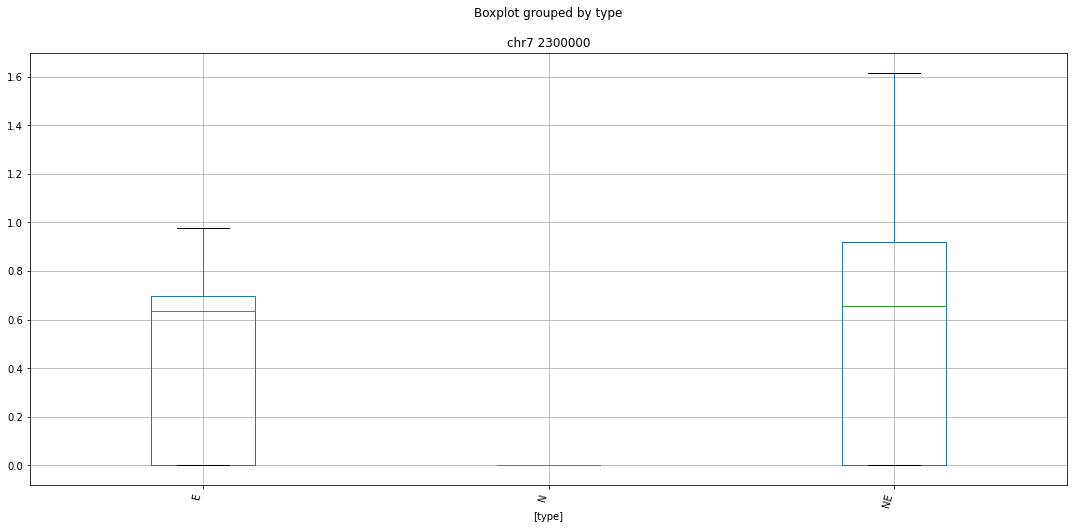

 p : 9.483991032808275e-05  ( t : 4.675209803868005 ) :  chr2 109630000


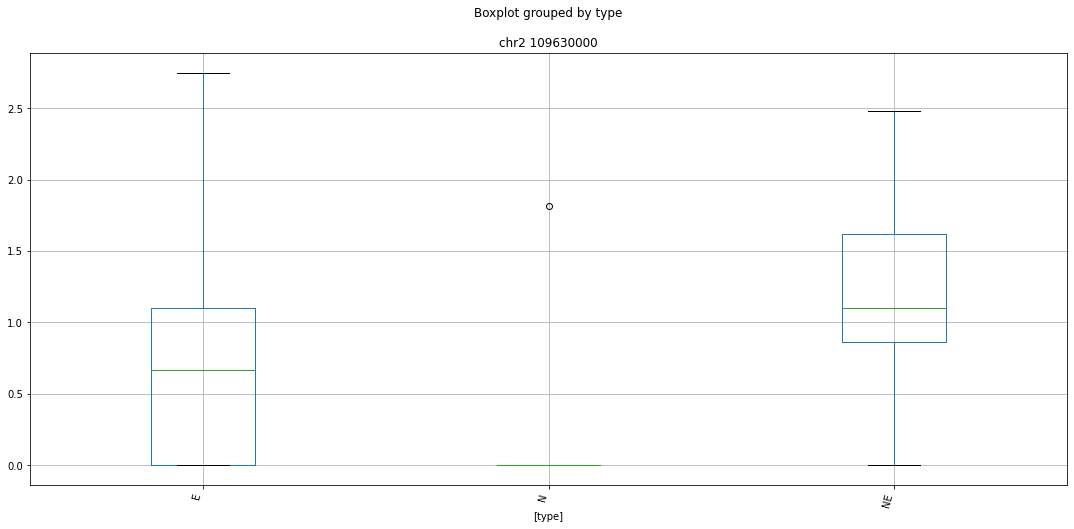

Clustermapping
['chr1 10020000' 'chr1 104130000' 'chr1 10420000' ... 'chrY 7710000'
 'subject' 'type']


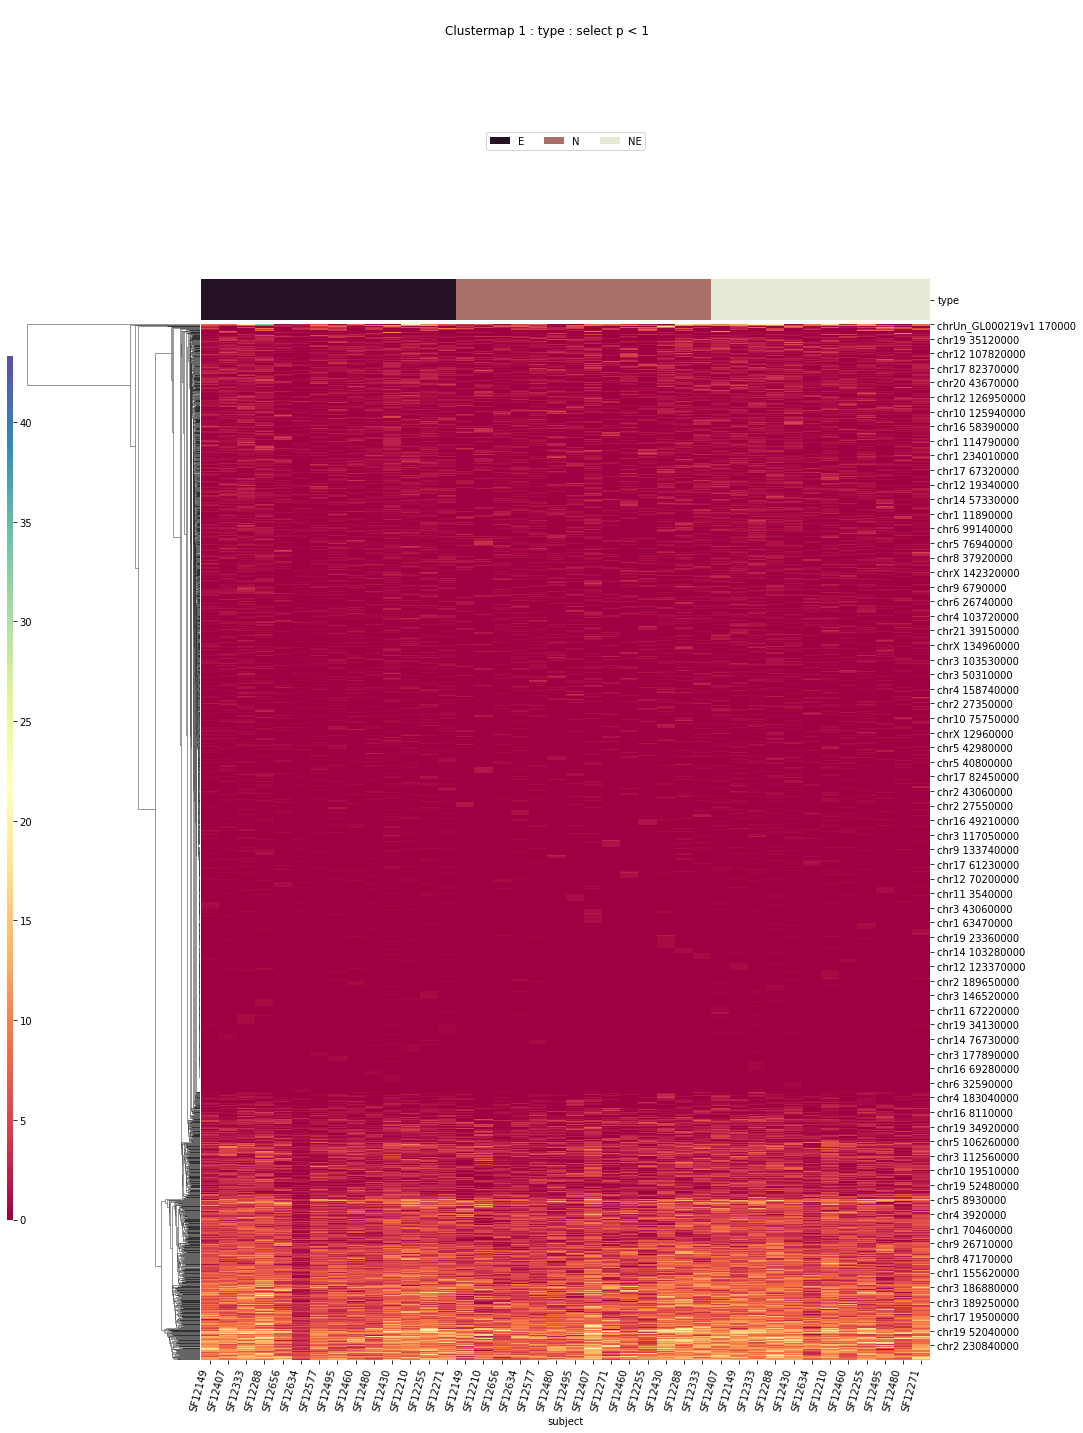

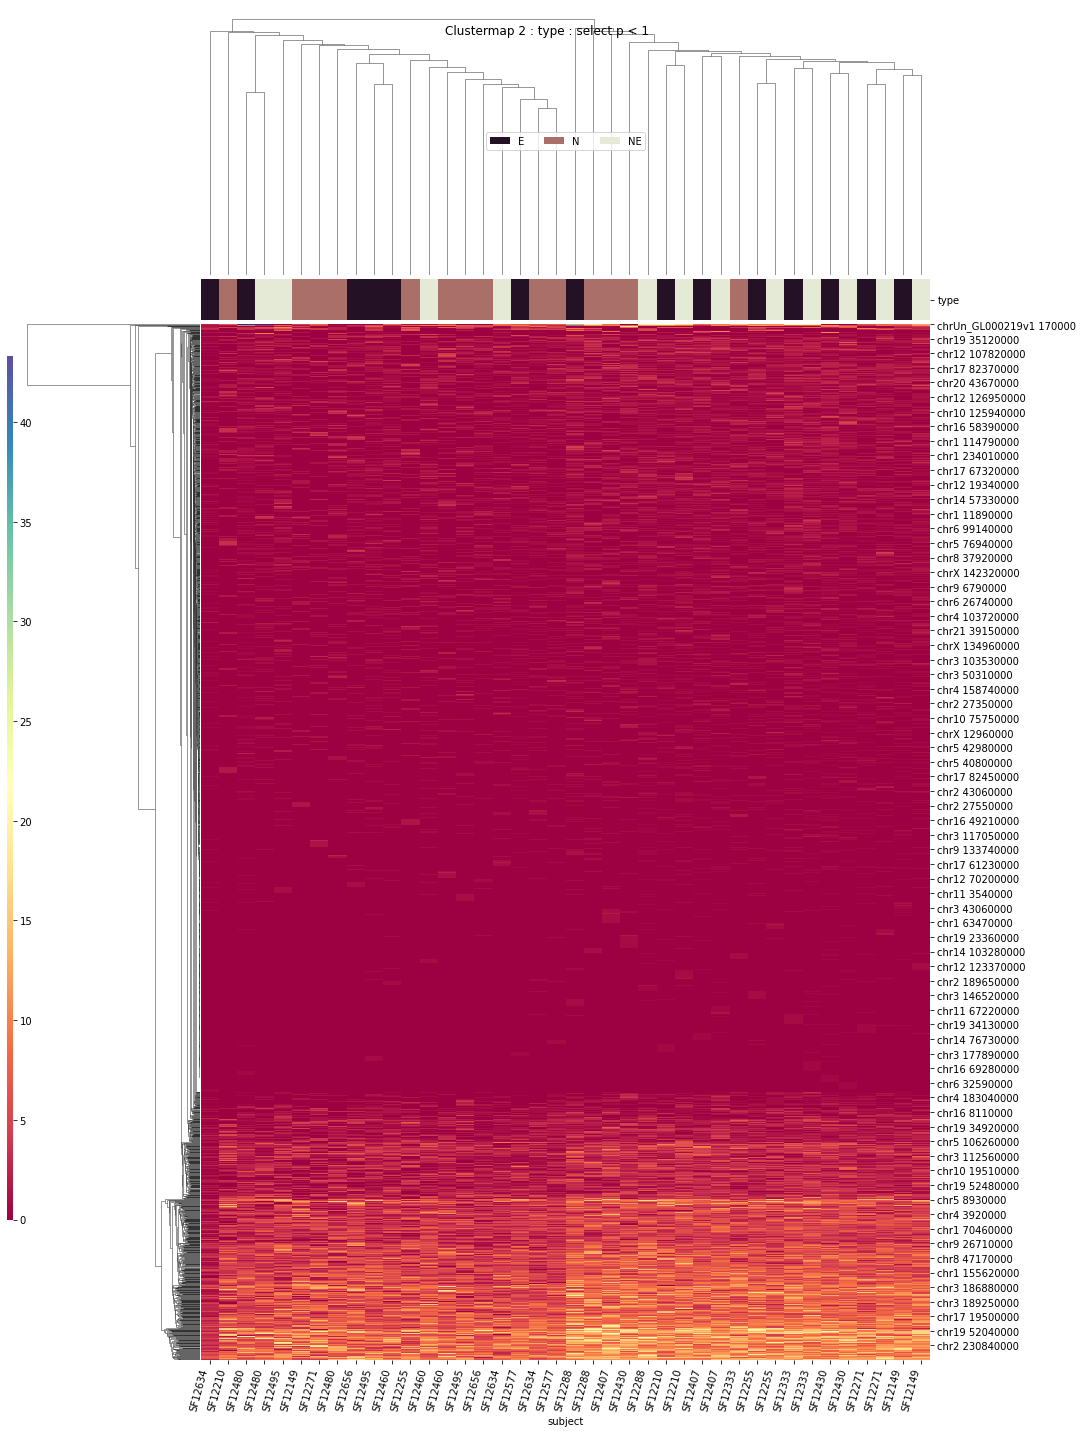

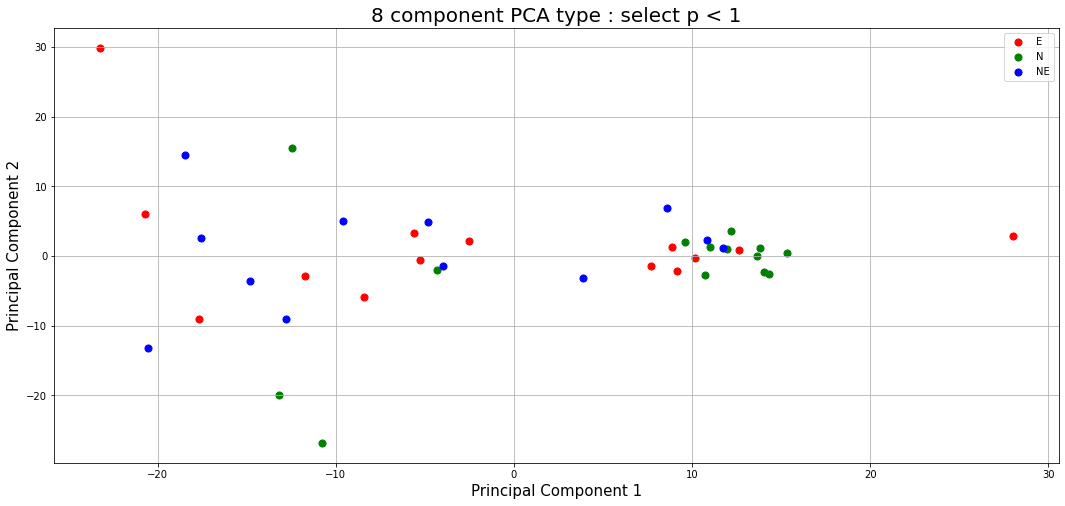

In [50]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-4,heat_p=1)
    

In [51]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 14:31:57'

type
T-Testing
Boxplotting
Clustermapping
['chr1 10020000' 'chr1 104130000' 'chr1 10420000' ... 'chrY 7710000'
 'subject' 'type']


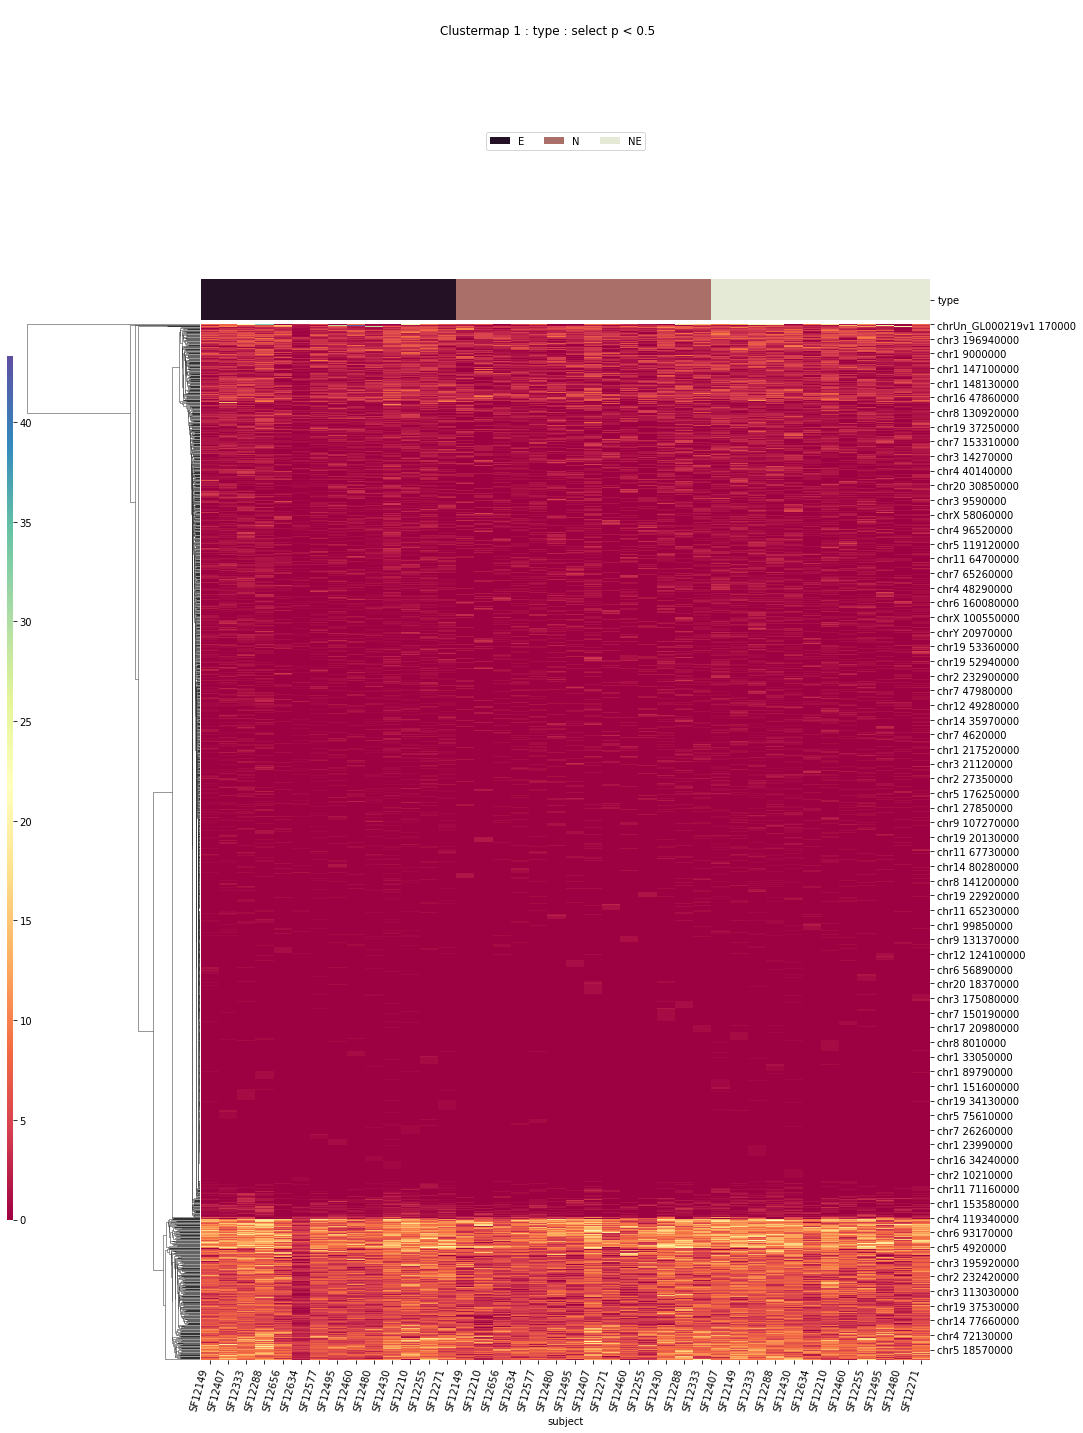

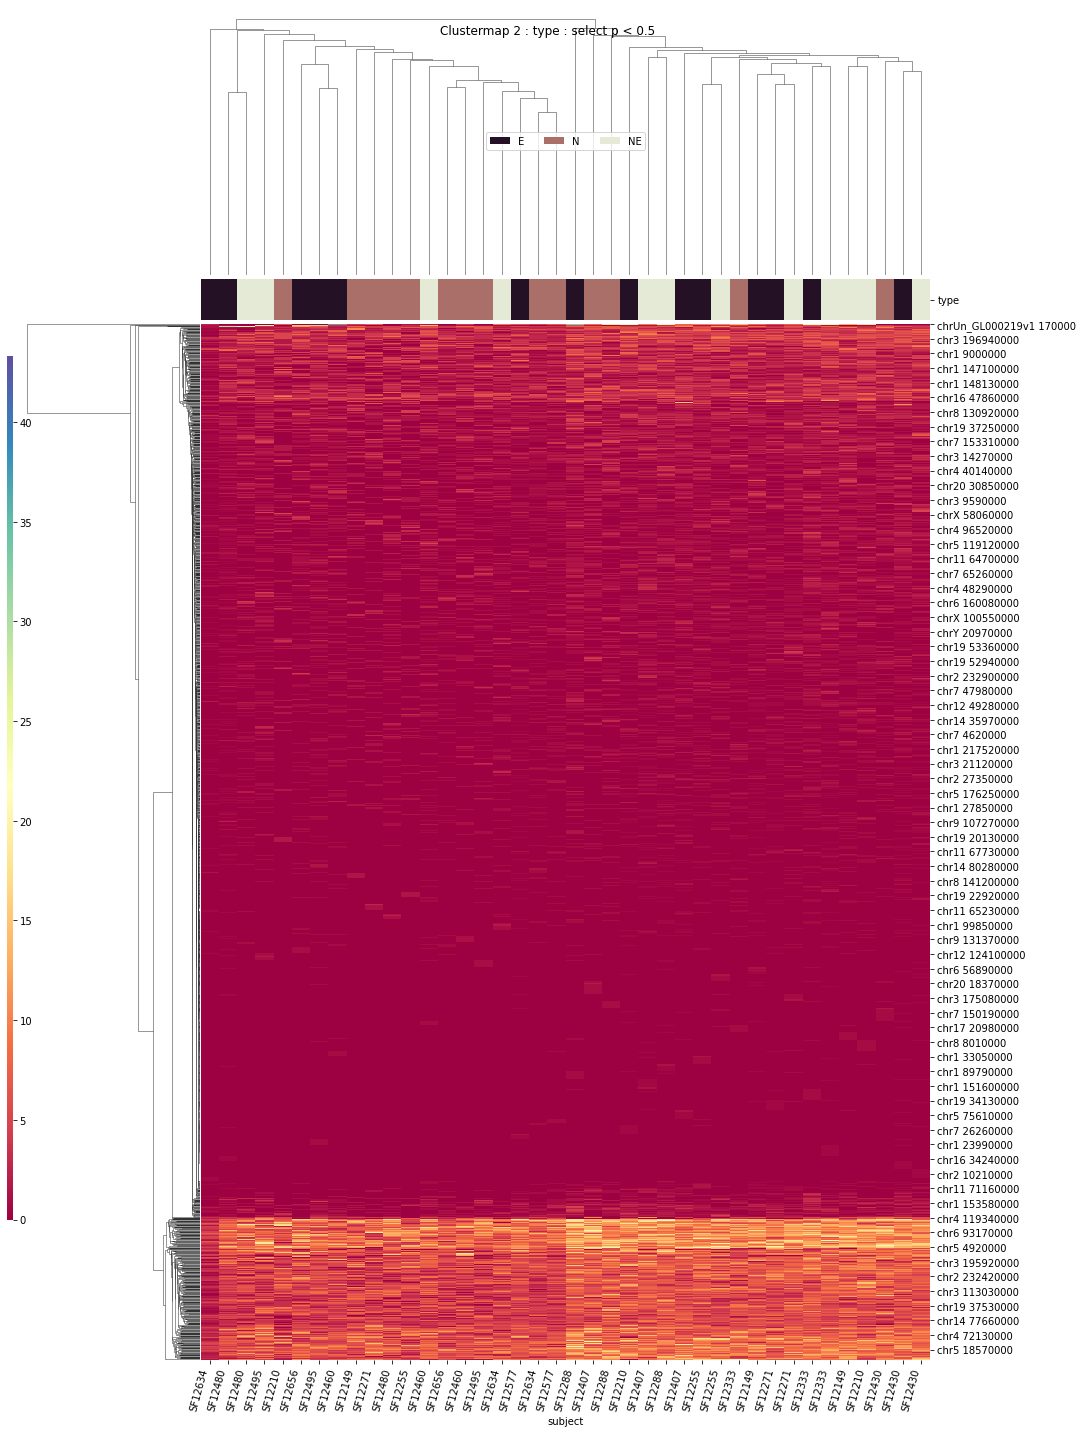

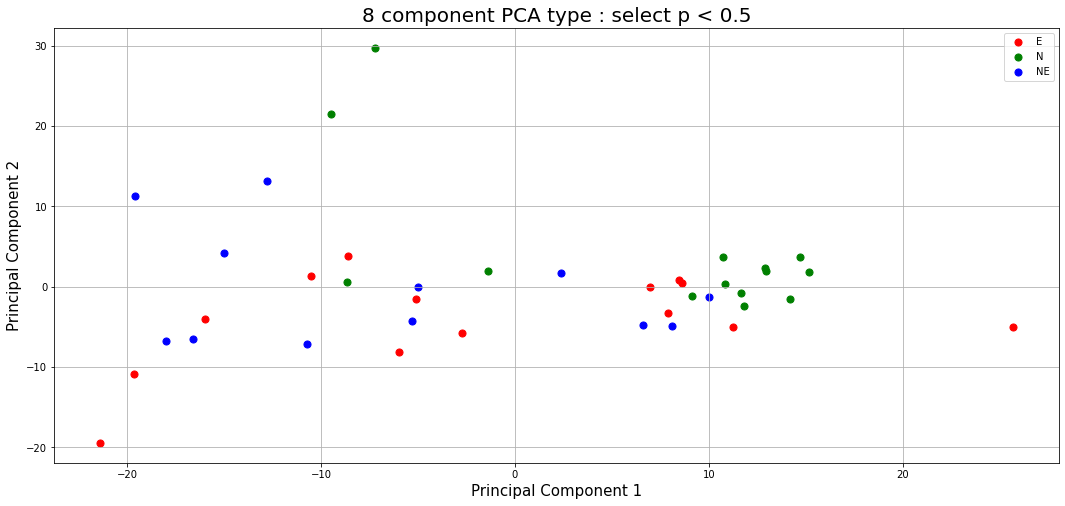

In [52]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-6,heat_p=0.5)
    

In [53]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 14:34:49'

type
T-Testing
Boxplotting
Clustermapping
['chr1 108150000' 'chr1 111800000' 'chr1 114790000' 'chr1 13320000'
 'chr1 13350000' 'chr1 1400000' 'chr1 1410000' 'chr1 147730000'
 'chr1 148130000' 'chr1 150710000' 'chr1 152450000' 'chr1 153580000'
 'chr1 154280000' 'chr1 155630000' 'chr1 156320000' 'chr1 160910000'
 'chr1 161410000' 'chr1 161420000' 'chr1 165090000' 'chr1 188750000'
 'chr1 199900000' 'chr1 202190000' 'chr1 202450000' 'chr1 209140000'
 'chr1 213150000' 'chr1 217520000' 'chr1 224100000' 'chr1 224340000'
 'chr1 227130000' 'chr1 227860000' 'chr1 231120000' 'chr1 234010000'
 'chr1 236420000' 'chr1 245770000' 'chr1 246080000' 'chr1 247220000'
 'chr1 25580000' 'chr1 25600000' 'chr1 27850000' 'chr1 29360000'
 'chr1 33060000' 'chr1 3750000' 'chr1 37890000' 'chr1 39230000'
 'chr1 42750000' 'chr1 45240000' 'chr1 45510000' 'chr1 46320000'
 'chr1 46390000' 'chr1 48170000' 'chr1 52000000' 'chr1 64410000'
 'chr1 70460000' 'chr1 73130000' 'chr1 76110000' 'chr1 77860000'
 'chr1 77980000' 'c

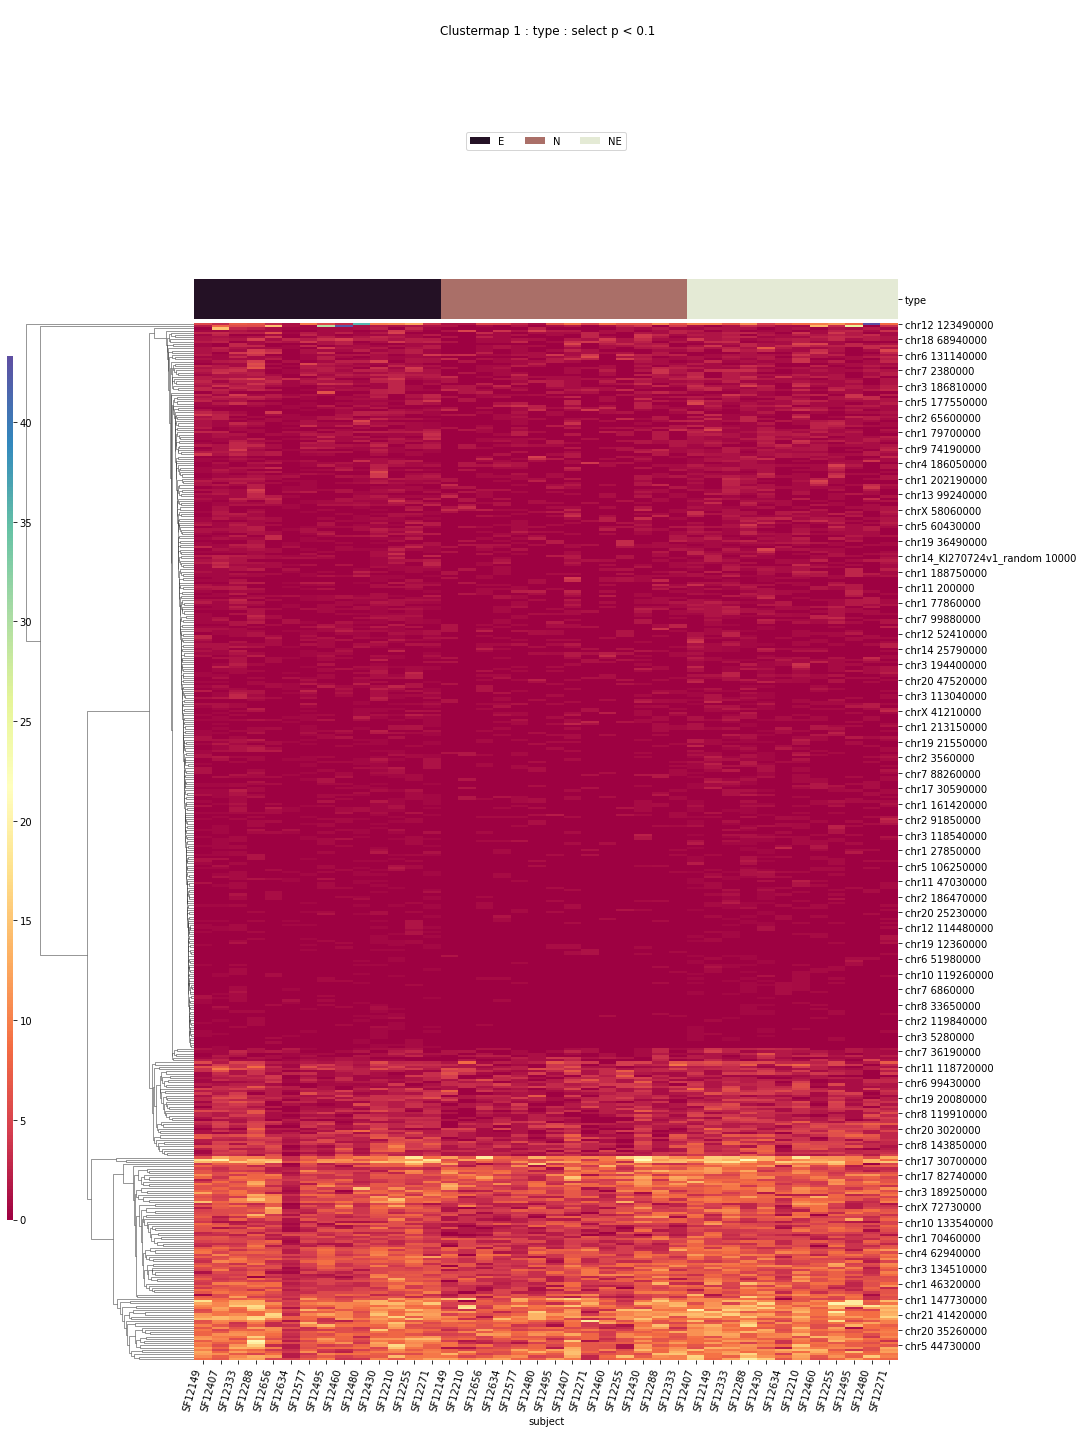

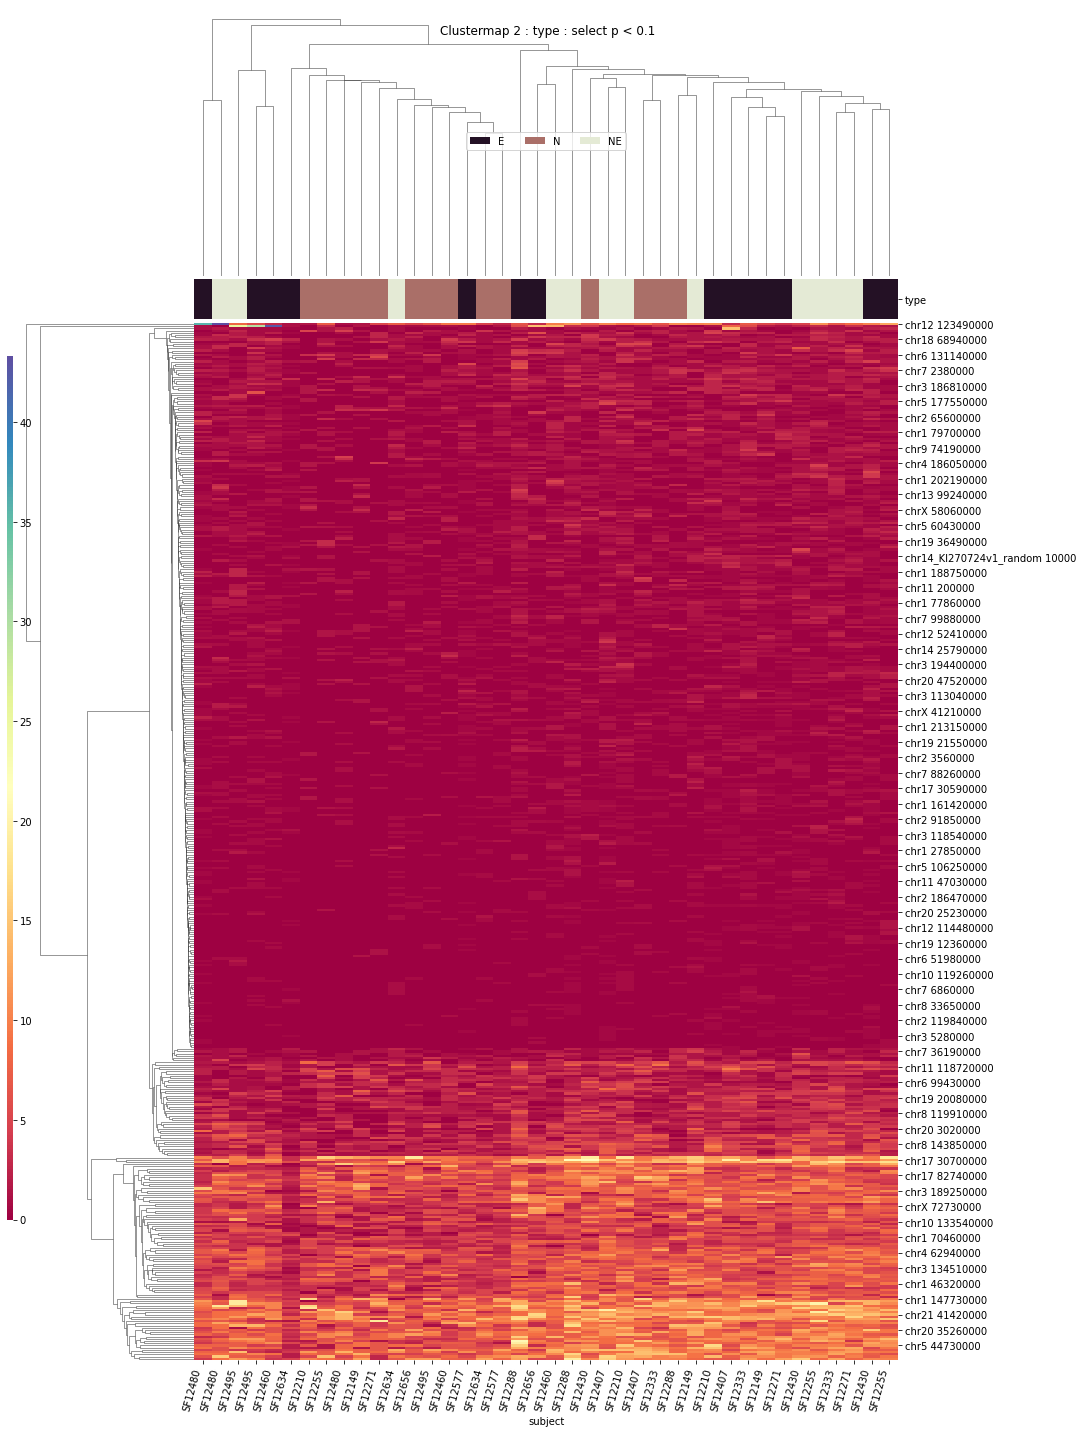

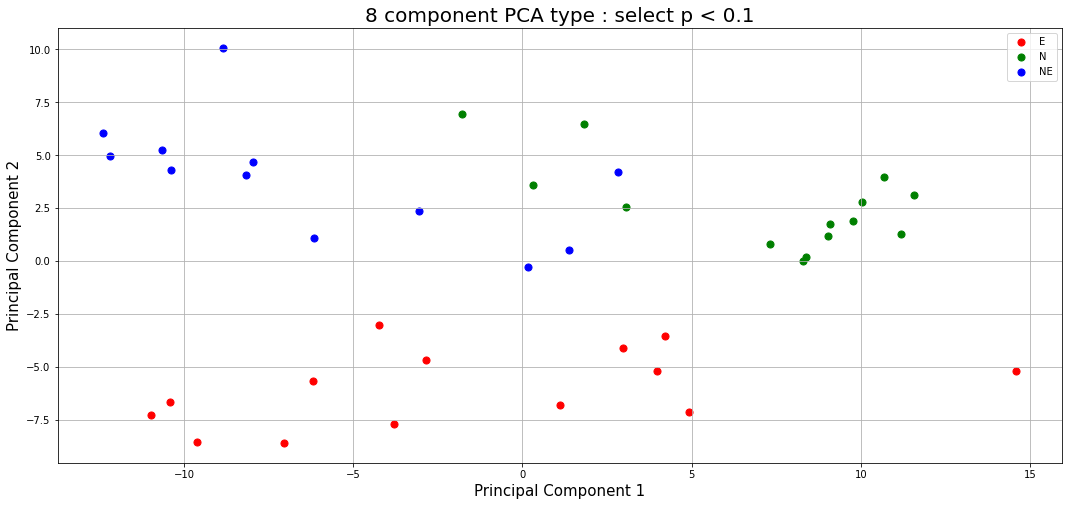

In [54]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-9,heat_p=0.1)
    

In [55]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 14:37:42'

type
T-Testing
Boxplotting
Clustermapping
['chr1 152450000' 'chr1 154280000' 'chr1 39230000' 'chr1 48170000'
 'chr10 133540000' 'chr10 43330000' 'chr10 68520000' 'chr10 70400000'
 'chr10 90300000' 'chr11 105260000' 'chr11 118720000' 'chr11 5960000'
 'chr11 62320000' 'chr12 114480000' 'chr12 4720000' 'chr12 49280000'
 'chr14 33980000' 'chr14 88020000' 'chr14 94650000' 'chr15 34940000'
 'chr16 3270000' 'chr17 28600000' 'chr17 30520000' 'chr18 12870000'
 'chr18 46080000' 'chr19 20280000' 'chr19 22100000' 'chr19 37250000'
 'chr19 37320000' 'chr19 37860000' 'chr19 51920000' 'chr19 52480000'
 'chr2 109630000' 'chr2 26740000' 'chr2 3560000' 'chr2 37750000'
 'chr2 65600000' 'chr2 91850000' 'chr20 35260000' 'chr20 38400000'
 'chr20 47520000' 'chr22 11320000' 'chr3 118540000' 'chr3 130050000'
 'chr3 196940000' 'chr4 151390000' 'chr4 49030000' 'chr5 119120000'
 'chr5 76810000' 'chr5 95810000' 'chr6 132720000' 'chr6 144430000'
 'chr6 159790000' 'chr6 169340000' 'chr6 27770000' 'chr6 77710000'
 'ch

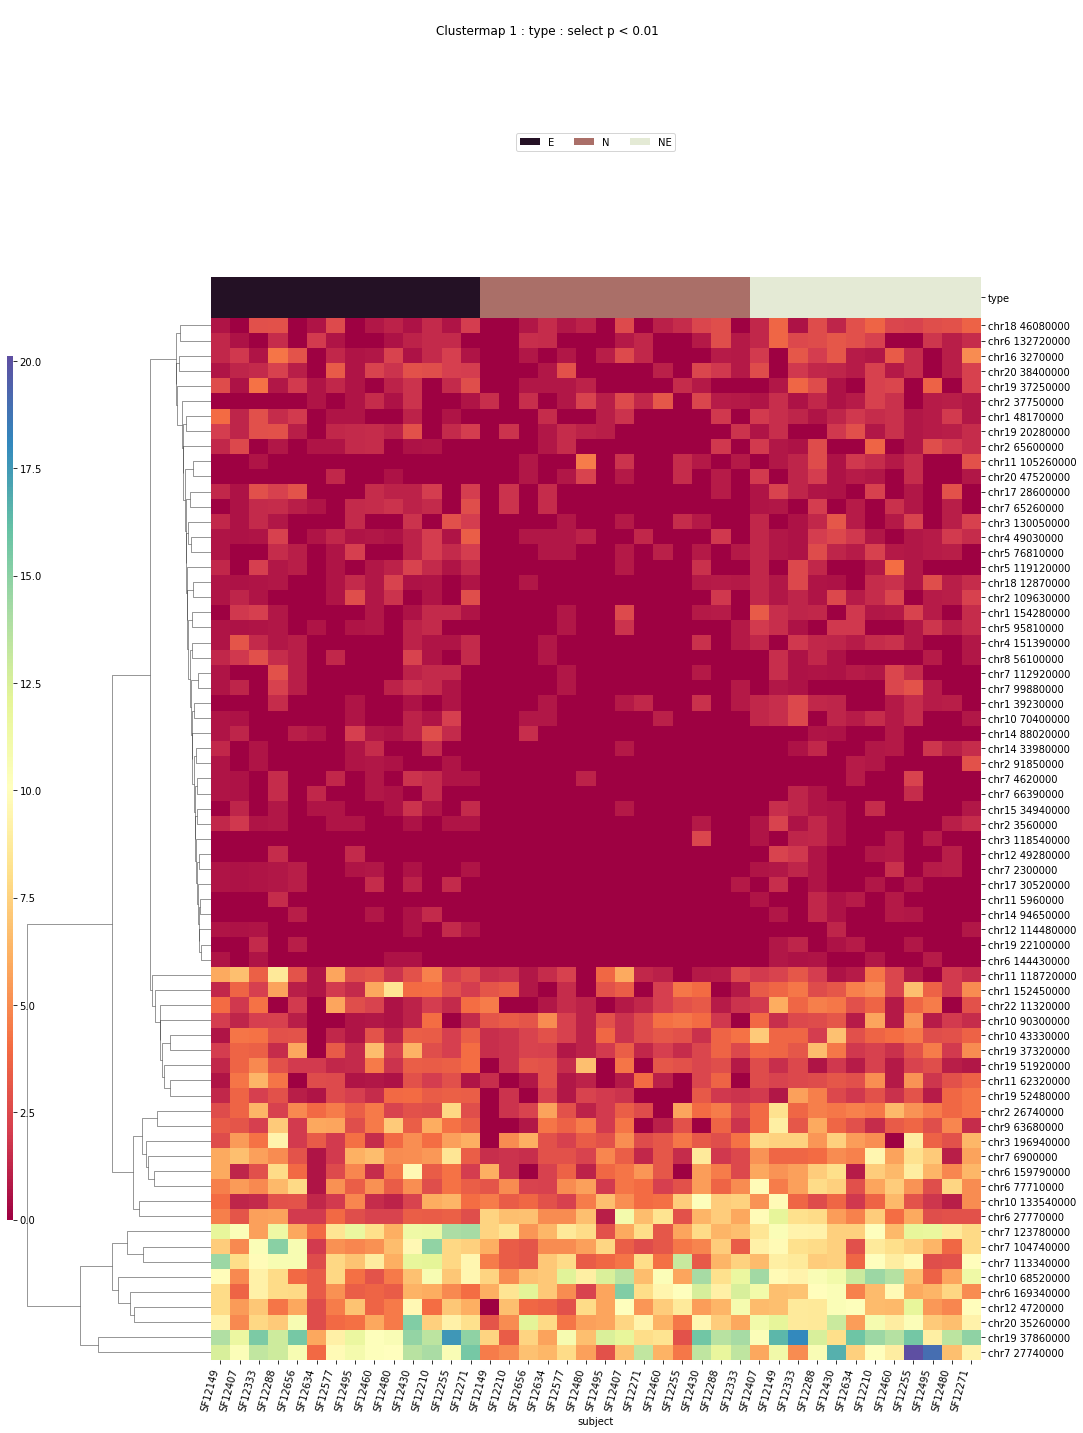

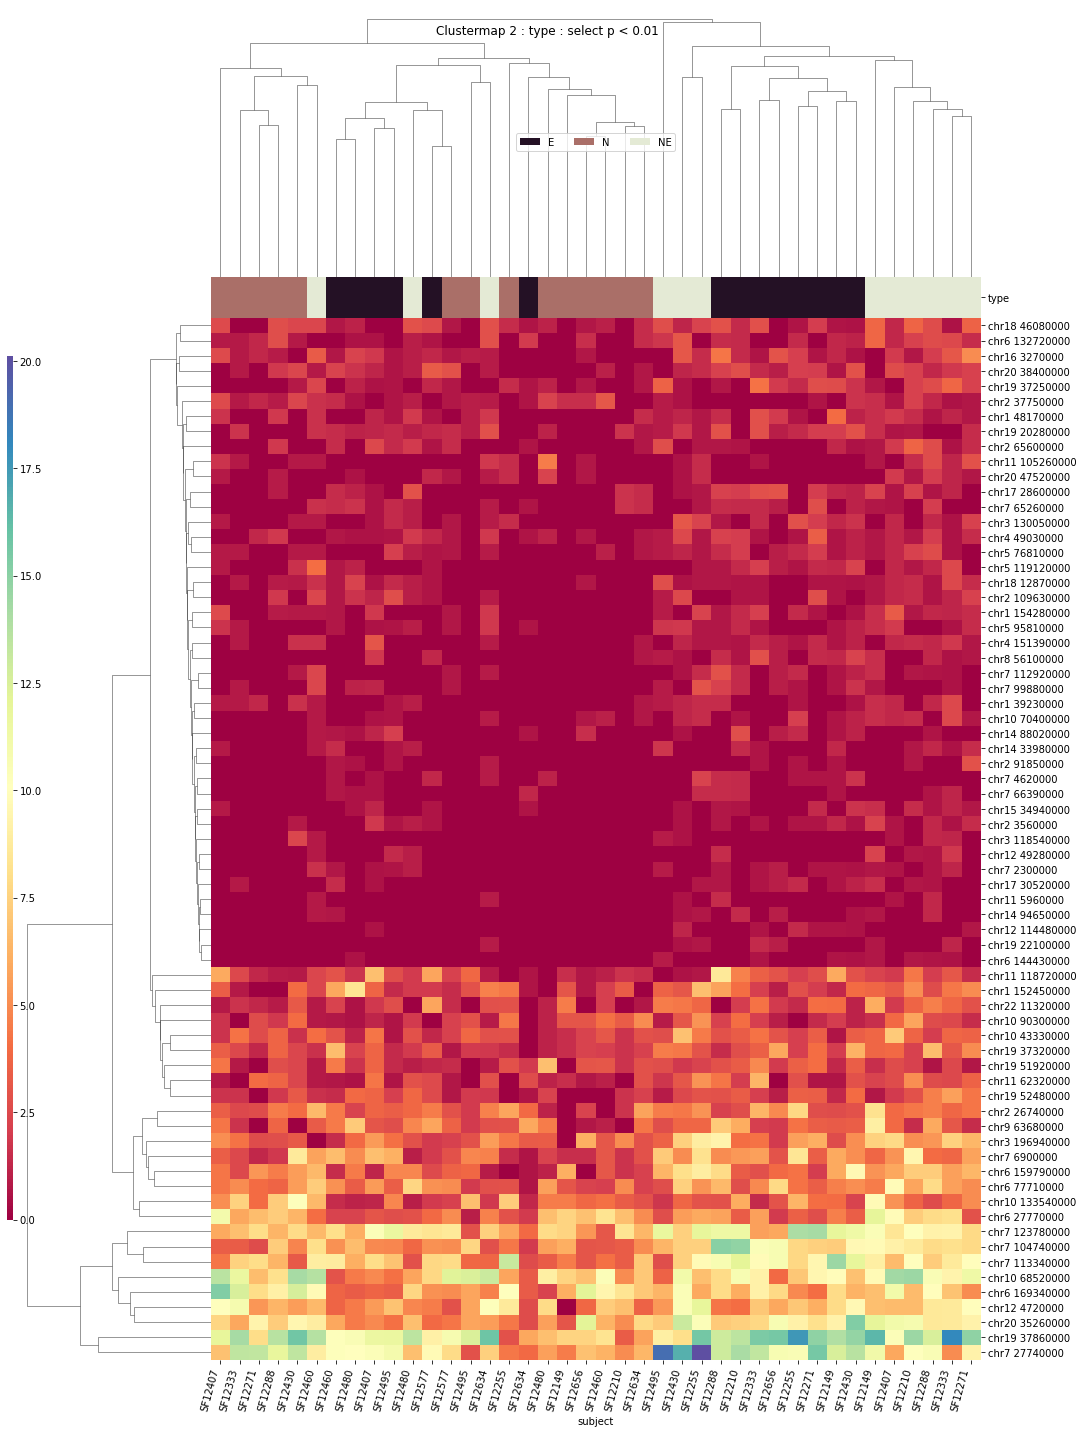

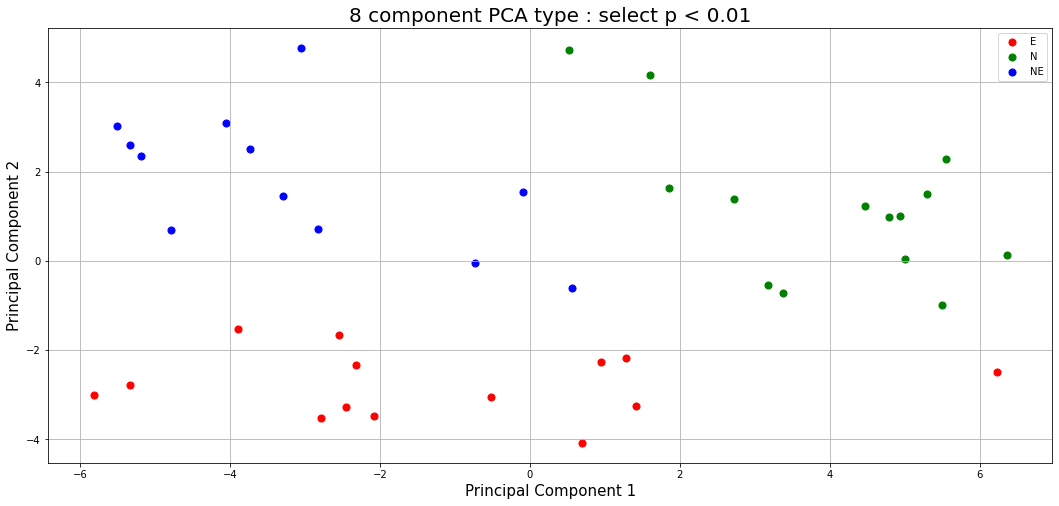

In [56]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [57]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 14:40:30'

type
T-Testing
Boxplotting
Clustermapping
['chr11 105260000' 'chr18 12870000' 'chr18 46080000' 'chr2 109630000'
 'chr6 159790000' 'chr6 27770000' 'chr7 123780000' 'chr7 2300000'
 'chr8 56100000' 'subject' 'type']


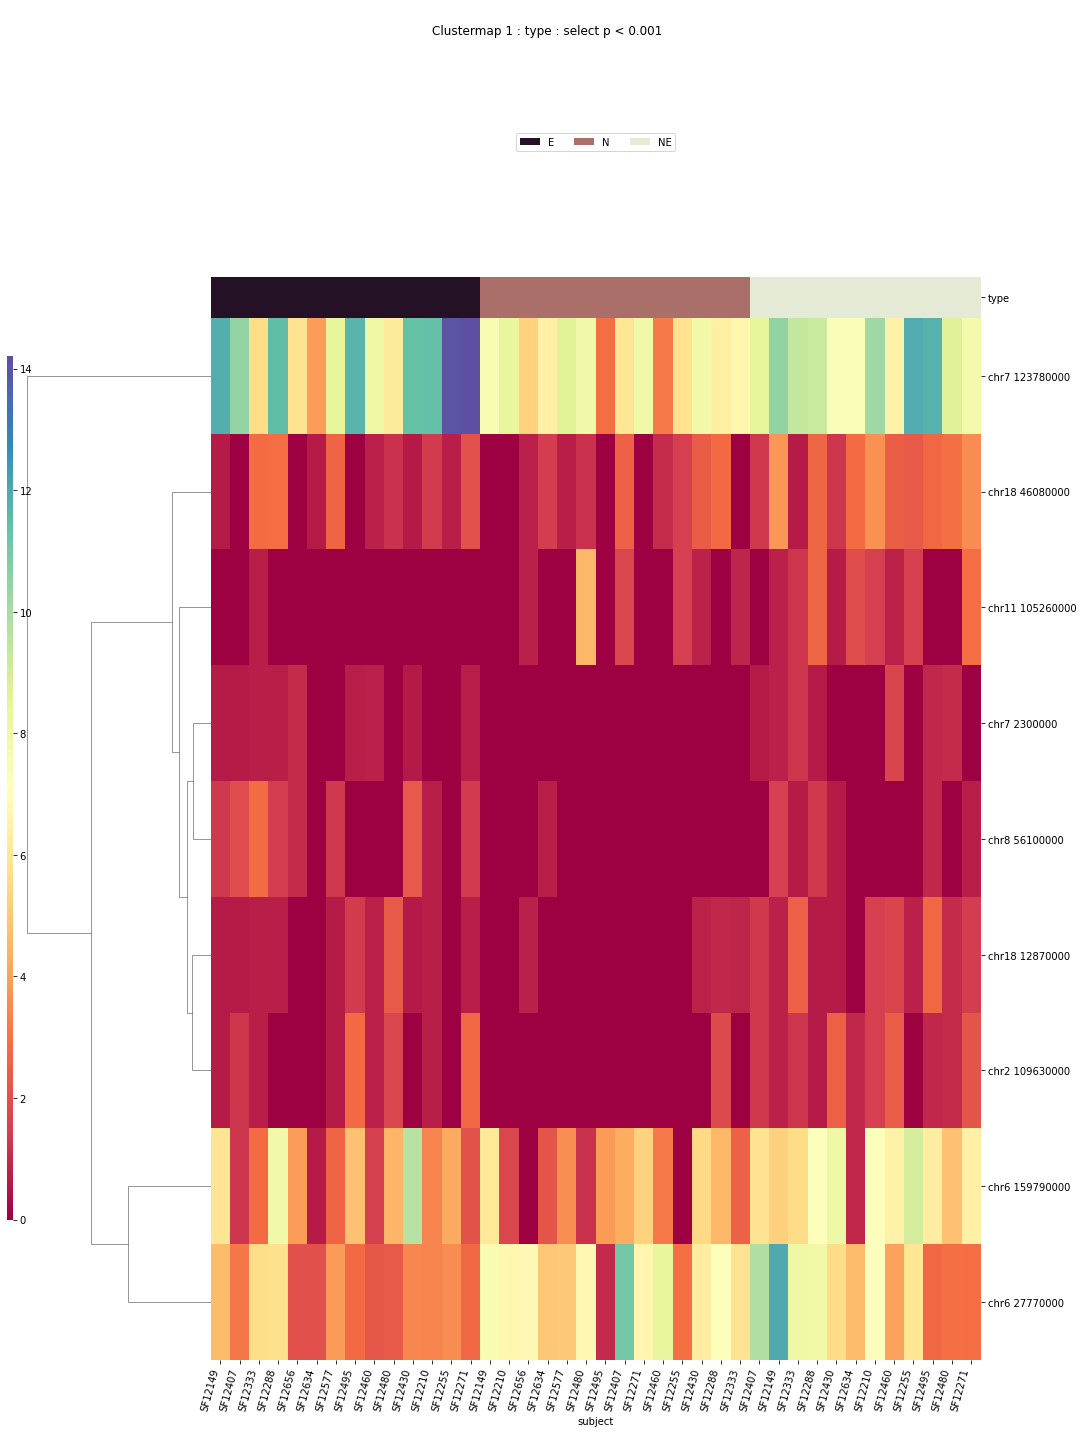

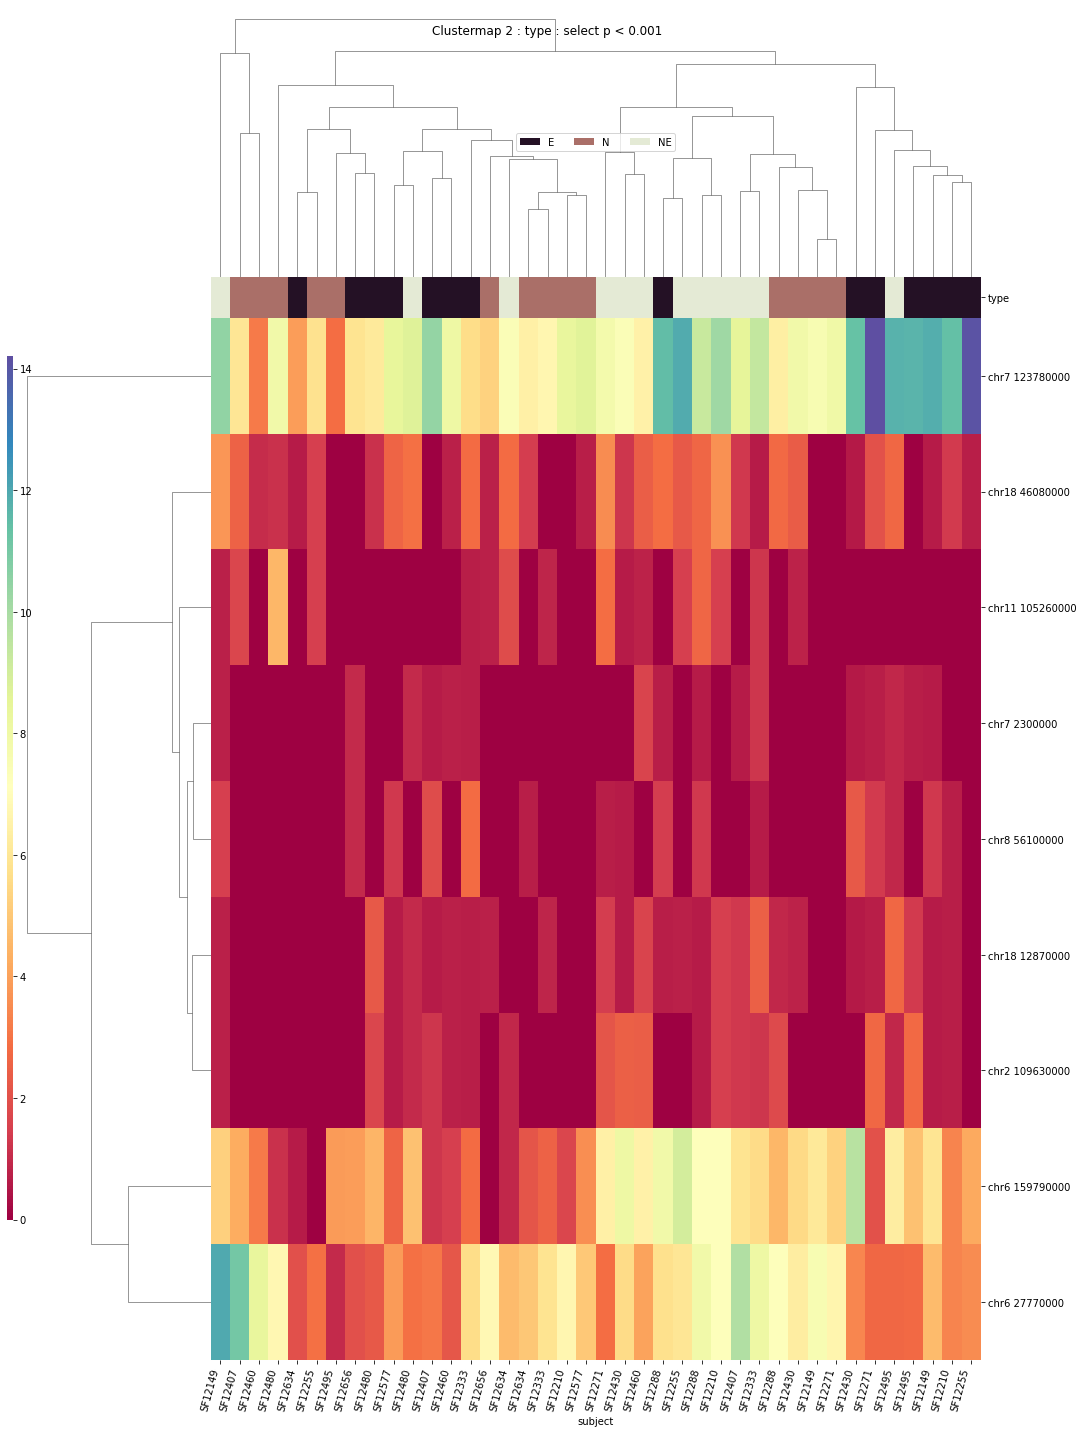

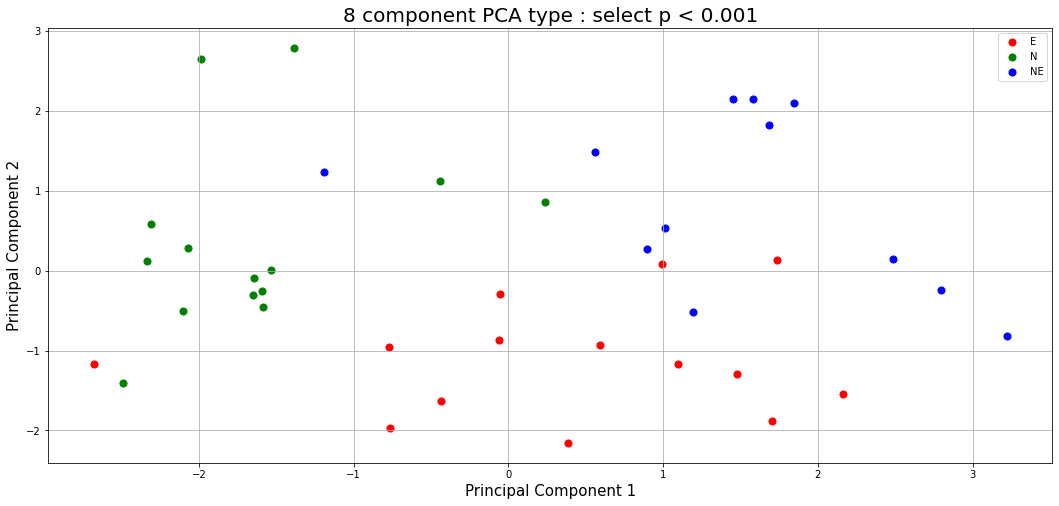

In [58]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [59]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 14:43:12'

---

In [60]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [61]:
pd.set_option('display.max_columns', default_max_columns)

In [62]:
pd.set_option('display.max_rows',default_max_rows)

In [63]:
pd.set_option('display.precision', default_precision)